Title: **Assignment 2 - COSC3013 Computational Machine Learning - End-to-end Machine Learning Project**

Student ID: **S3979613**

Student Name and email (contact info): **Dao Sy Trung Kien - S3979613@rmit.edu.vn**

Affiliations: **RMIT University Vietnam.**

Date of Report: 03/08/2023

I certify that this is all my own original work. If I took any parts from elsewhere, then they were non-essential parts of the assignment, and they are clearly attributed in my submission.  I will show I agree to this honor code by typing "Yes": Yes.

Please start your report here. 

### Required Libraries and Utilities

In [197]:
# Importing packages - Pandas, Numpy, Seaborn, Scipy, Impute
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import matplotlib.style as style; style.use('fivethirtyeight')
np.random.seed(0)
from sklearn.impute import SimpleImputer

# Modelling
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

# Oversampling
from imblearn.over_sampling import SMOTE

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

### Import data and check for null values.

In [198]:
# Code for import data from Paitients_Files_Train csv file
df_train = pd.read_csv(r'A2_data/UCI-electricity/UCI_data.csv')
# Print out data.
df_train.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


In [199]:
# Calculating the Missing Values % contribution in Train Data
df_train_null = round(100*(df_train.isnull().sum())/len(df_train), 2)
df_train_null

date             0.0
T1               0.0
RH_1             0.0
T2               0.0
RH_2             0.0
T3               0.0
RH_3             0.0
T4               0.0
RH_4             0.0
T5               0.0
RH_5             0.0
T6               0.0
RH_6             0.0
T7               0.0
RH_7             0.0
T8               0.0
RH_8             0.0
T9               0.0
RH_9             0.0
T_out            0.0
Press_mm_hg      0.0
RH_out           0.0
Windspeed        0.0
Visibility       0.0
Tdewpoint        0.0
rv1              0.0
rv2              0.0
TARGET_energy    0.0
dtype: float64

### Basic Data Exploration and Data Cleansing.

In [200]:
# Check the dimensions of the Training dataset
print(df_train.shape)

(19735, 28)


In [201]:
# Get info of the dataframe columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

In [202]:
# Convert the datetime column to a pandas datetime object
df_train['datetime'] = pd.to_datetime(df_train['date'])

# Create new columns for date and time
df_train['date'] = df_train['datetime'].dt.date
df_train['time'] = df_train['datetime'].dt.time

#Hour of the Day
df_train['hour'] = df_train['datetime'].dt.hour

# Day Part
df_train['day_part'] = pd.cut(df_train['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Season
df_train['month'] = df_train['datetime'].dt.month
df_train['season'] = df_train['month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Spring' if x in [3, 4, 5] else 'Summer' if x in [6, 7, 8] else 'Fall')

# Drop the original datetime column if no longer needed
df_train.drop('datetime', axis=1, inplace=True)

In [203]:
# Get info of the dataframe columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   date           19735 non-null  object  
 1   T1             19735 non-null  float64 
 2   RH_1           19735 non-null  float64 
 3   T2             19735 non-null  float64 
 4   RH_2           19735 non-null  float64 
 5   T3             19735 non-null  float64 
 6   RH_3           19735 non-null  float64 
 7   T4             19735 non-null  float64 
 8   RH_4           19735 non-null  float64 
 9   T5             19735 non-null  float64 
 10  RH_5           19735 non-null  float64 
 11  T6             19735 non-null  float64 
 12  RH_6           19735 non-null  float64 
 13  T7             19735 non-null  float64 
 14  RH_7           19735 non-null  float64 
 15  T8             19735 non-null  float64 
 16  RH_8           19735 non-null  float64 
 17  T9             19735 non-null  

In [204]:
# Five point summary of numerical attributes
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000
T5,19735.0,19.592106,1.844623,15.330000,18.277500,19.390000,20.619643,25.795000
RH_5,19735.0,50.949283,9.022034,29.815000,45.400000,49.090000,53.663333,96.321667


In [205]:
median_windspeed = df_train['Windspeed'].median()
# Replace missing values with median
df_train['Windspeed'].replace(0, median_windspeed, inplace=True)

In [206]:
df_train.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy,hour,month
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,...,755.522602,79.750418,4.040866,38.330834,3.760707,24.988033,24.988033,101.496833,11.502002,3.101647
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,...,7.399441,14.901088,2.450217,11.794719,4.194648,14.496634,14.496634,104.380829,6.921953,1.339200
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,...,729.300000,24.000000,0.166667,1.000000,-6.600000,0.005322,0.005322,10.000000,0.000000,1.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,...,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,50.000000,6.000000,2.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,...,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,60.000000,12.000000,3.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,...,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,100.000000,17.000000,4.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,...,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1110.000000,23.000000,5.000000


### Features Engineering

In [207]:
#Get the mean of TARGET_energy for each 3 hours and 24 hours
df_train['moving_avg_3_hours'] = df_train['TARGET_energy'].rolling(window=3).mean()
df_train['moving_avg_24_hours'] = df_train['TARGET_energy'].rolling(window=24).mean()

With these features, it is gonna take the mean of TARGET_energy of 3 hours. Like, \
0:00  100   Nan \
1:00  50    Nan \
2:00  60    (100 + 50 + 60) / 3 \
\
Because it skips a few row so I change it into 0 in the following steps

In [208]:
#Get the total TARGET_energy of a day 
df_train['datetime'] = pd.to_datetime(df_train['date'])
df_train['daily_total_usage'] = df_train.groupby(df_train['datetime'].dt.date)['TARGET_energy'].transform('sum')
df_train.drop('datetime', axis=1, inplace=True)

In [209]:
#The difference between TARGET_energy in this day at this time with the next day.
df_train['rate_of_change_day'] = df_train['TARGET_energy'].diff(periods=24)
#The difference between TARGET_energy in this day at this time with the next 3 hours.
df_train['rate_of_change_3_hours'] = df_train['TARGET_energy'].diff(periods=3)


With these features, it is gonna calculate the different with number of periods ago. Like, \
0:00  100   Nan \
1:00  50    Nan \
2:00  60    Nan \
3:00  120   (120 - 100) = 20 \
...    
\
Because it skips a few row so I change it into 0 in the following steps

In [210]:
temperature_columns = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9']
humidity_columns = ['RH_1', 'RH_2', 'RH_3', 'RH_4', 'RH_5', 'RH_6', 'RH_7', 'RH_8', 'RH_9']

In [211]:
season_to_number = {
    "Spring": 1,
    "Summer": 2,
    "Fall": 3,
    "Winter": 4
}
df_train['season_encoded'] = df_train['season'].map(season_to_number)

In [212]:
# Encode the 'day_part' categorical feature into numerical values
df_train['day_part_encoded'] = df_train['day_part'].cat.codes

In [213]:
#Because these apply on the first 3 and 24 rows so I turn it to zero
df_train['rate_of_change_day'].fillna(0, inplace=True)
df_train['moving_avg_3_hours'].fillna(0, inplace=True)
df_train['moving_avg_24_hours'].fillna(0, inplace=True)
df_train['rate_of_change_3_hours'].fillna(0, inplace=True)

In [214]:
#Get the accurate daylight (sunrise) based on the time in Belgium
daylight_hours = {
    (12, 1, 2): (9, 16),  # Winter: 9 AM to 4 PM
    (3, 4, 5): (7, 19),   # Spring: 7 AM to 7 PM
    (6, 7, 8): (6, 21),   # Summer: 6 AM to 9 PM
    (9, 10, 11): (7, 18)  # Fall: 7 AM to 6 PM
}

def is_daylight(row):
    month = row['month']
    hour = row['hour']
    for months, hours in daylight_hours.items():
        if month in months:
            return 1 if hours[0] <= hour <= hours[1] else 0

# Apply the function to create the 'daylight' column
df_train['daylight'] = df_train.apply(is_daylight, axis=1)

In [215]:
# Encode the 'day_part' categorical feature into numerical values
df_train['day_part_encoded'] = df_train['day_part'].cat.codes

### Correlation

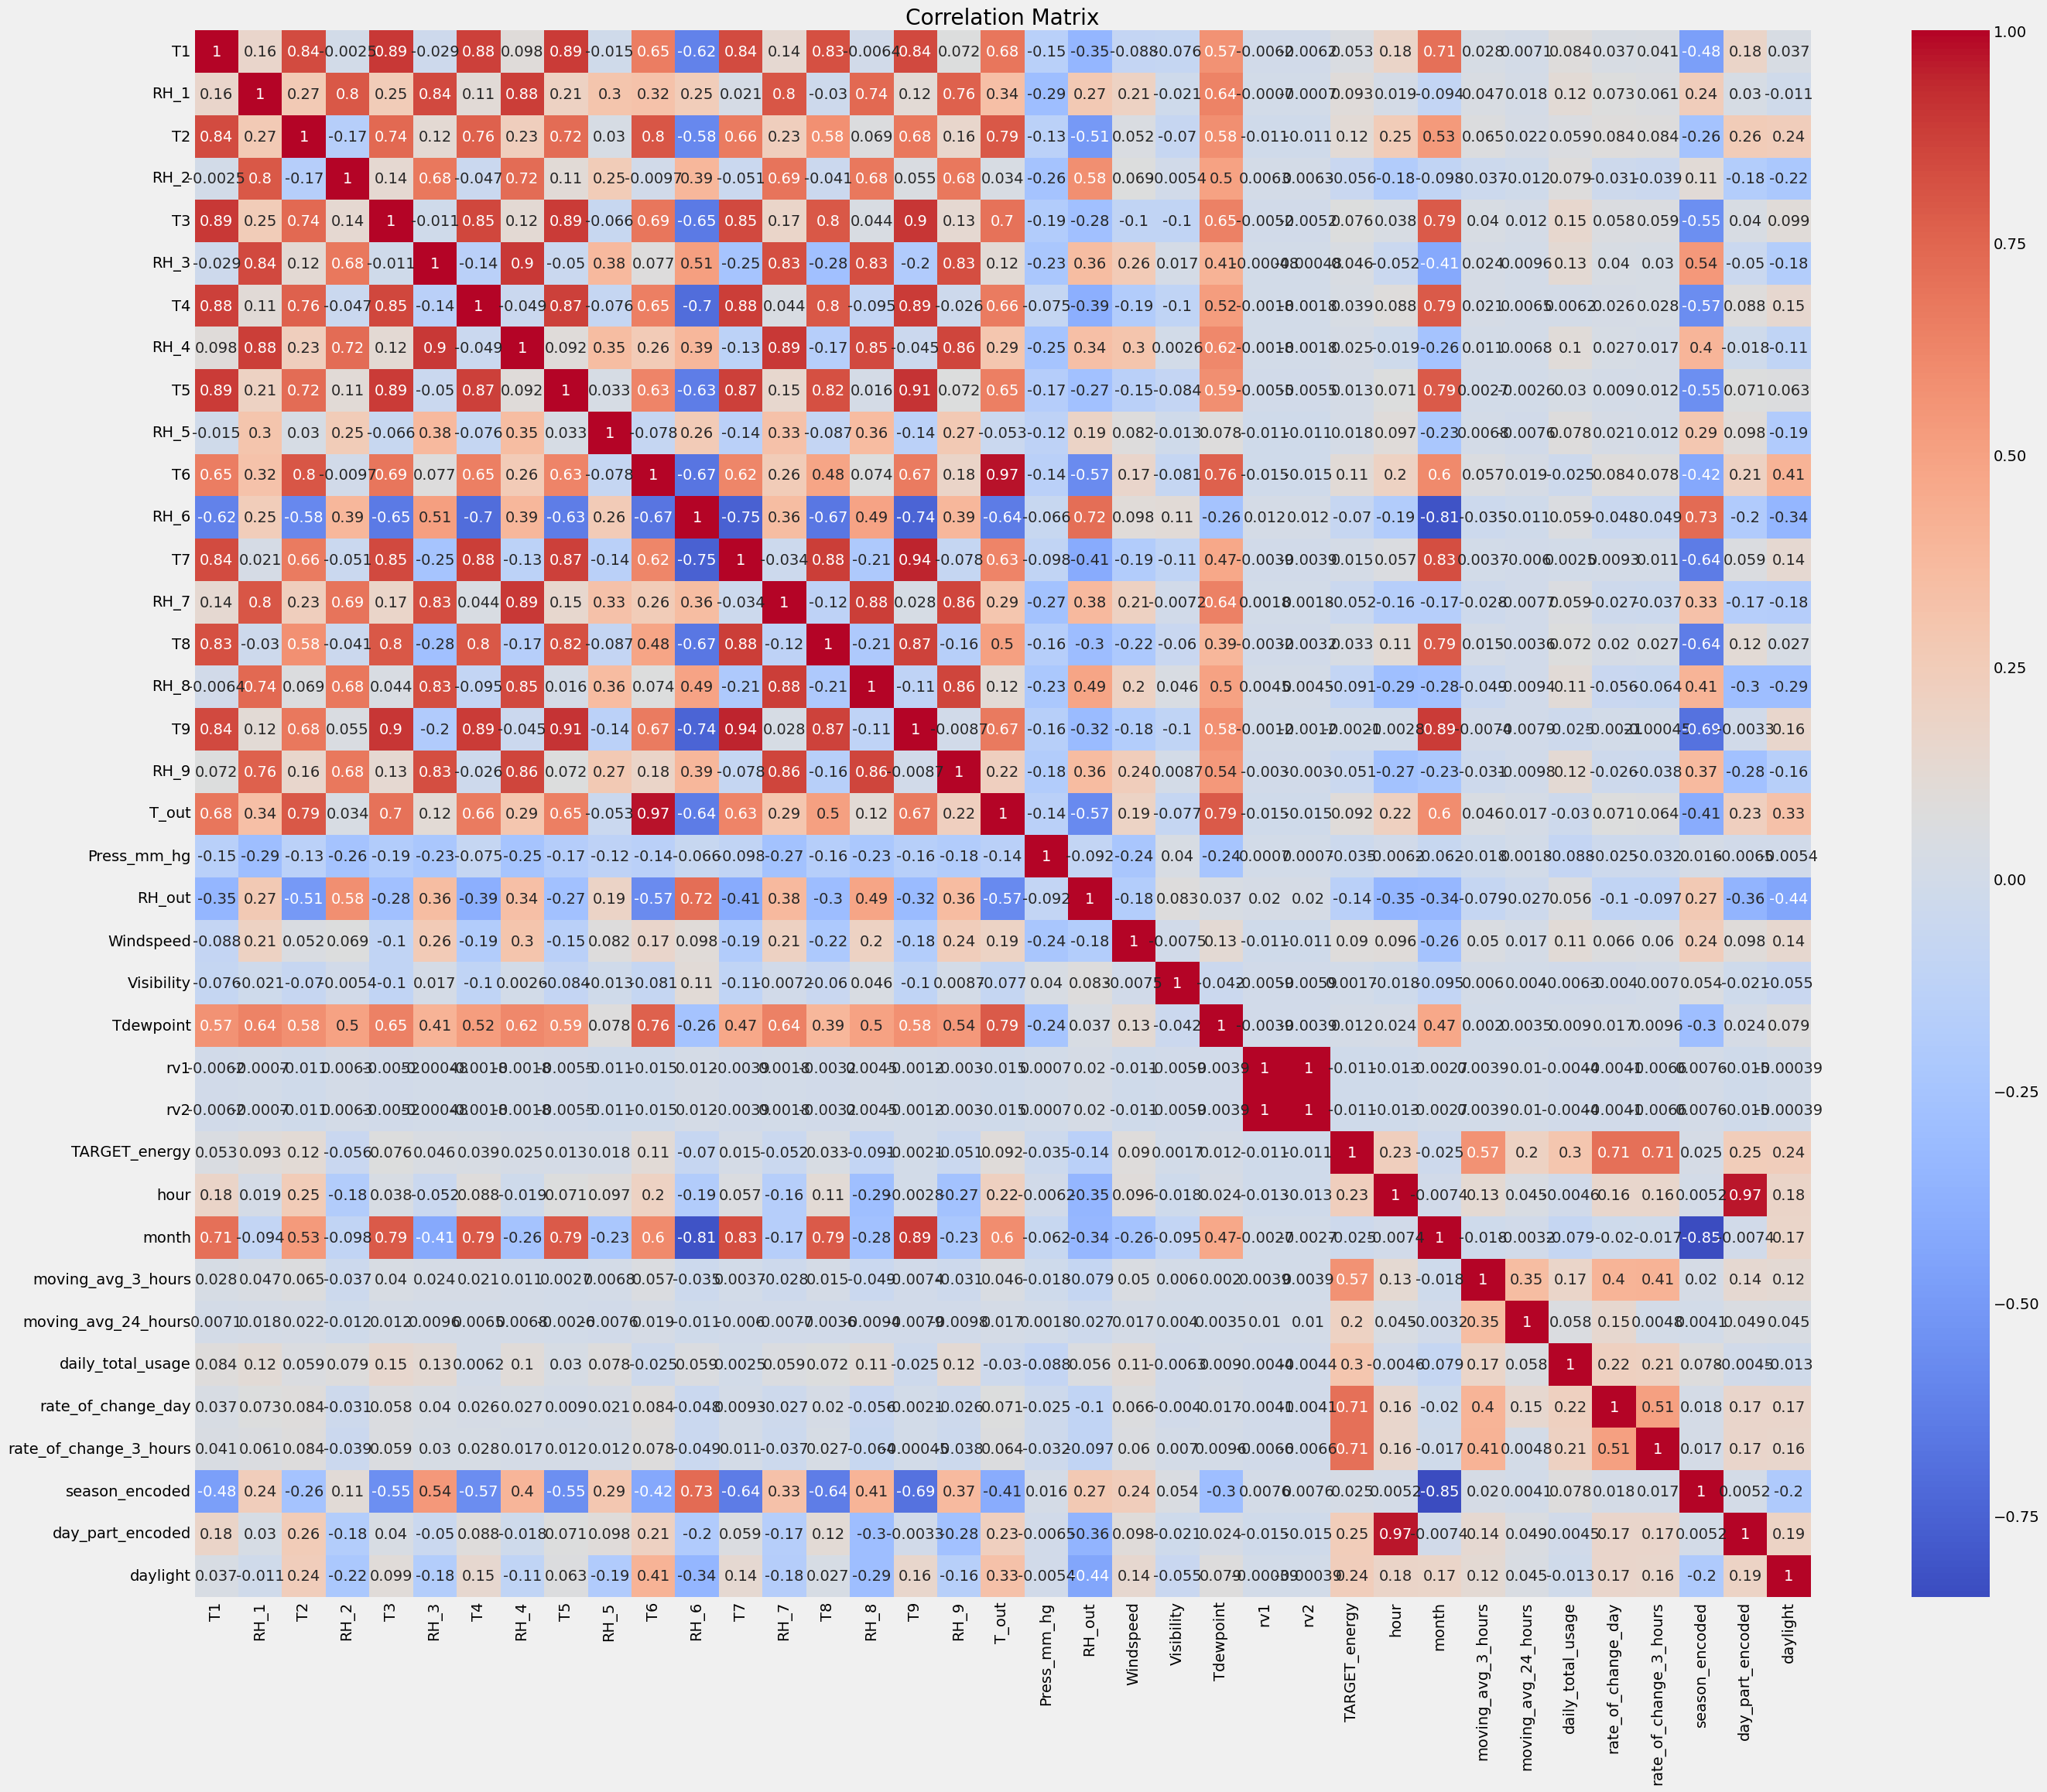

In [216]:
# Correlation Matrix
numeric_df_train = df_train.select_dtypes(include=[np.number])
plt.figure(figsize=(30, 25))
sns.heatmap(numeric_df_train.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [217]:
#These 2 attributes did not return any valuable value so I chose to delete it
df_train.drop(['rv1','rv2'], axis=1, inplace=True)

(array([2.876e+03, 9.940e+03, 2.899e+03, 1.536e+03, 4.540e+02, 2.090e+02,
        3.250e+02, 3.250e+02, 1.920e+02, 2.410e+02, 2.060e+02, 9.900e+01,
        1.010e+02, 6.900e+01, 2.800e+01, 5.500e+01, 5.800e+01, 2.500e+01,
        3.000e+01, 2.600e+01, 1.200e+01, 1.500e+01, 5.000e+00, 3.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  10.        ,   46.66666667,   83.33333333,  120.        ,
         156.66666667,  193.33333333,  230.        ,  266.66666667,
         303.33333333,  340.        ,  376.66666667,  413.33333333,
         450.        ,  486.66666667,  523.33333333,  560.        ,
         596.66666667,  633.33333333,  670.        ,  706.66666667,
         743.33333333,  780.        ,  816.66666667,  853.33333333,
         890.        ,  926.66666667,  963.33333333, 1000.        ,
        1036.66666667, 1073.33333333, 1110.        ]),
 <BarContainer object of 30 artists>)

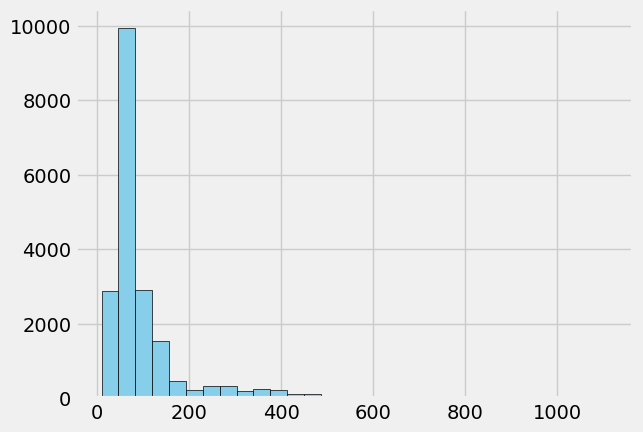

In [218]:
#Check on the TARGET_energy is there any skewed on the dataset
plt.hist(df_train['TARGET_energy'], bins=30, color='skyblue', edgecolor='black')

The chart shows that the frequencies of TARGET_energy is skewed right. So I decide to scale the dataset for better performance

### Modeling

Below gonna be Linear Regression and SVR models perform on ['day_part_encoded', 'is_daylight', 'rate_of_change_day', 'daily_total_usage', 'moving_avg_3_hours', 'moving_avg_24_hours', 'season_encoded'] attributes

In [219]:
X = df_train[['day_part_encoded', 'daylight', 'rate_of_change_day', 'daily_total_usage', 'moving_avg_3_hours', 'moving_avg_24_hours', 'season_encoded']]
y = df_train['TARGET_energy']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
#Scale the X_train and X_test
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [222]:
#Check if there any null values
inf_in_scaled = np.isinf(X_train_scaled).sum()
print(f"Number of infinite values in X_train_scaled: {inf_in_scaled}")
nan_in_train = np.isnan(X_train).sum()
print(f"Number of NaN values in X_train before scaling: {nan_in_train}")

Number of infinite values in X_train_scaled: 0
Number of NaN values in X_train before scaling: day_part_encoded       0
daylight               0
rate_of_change_day     0
daily_total_usage      0
moving_avg_3_hours     0
moving_avg_24_hours    0
season_encoded         0
dtype: int64


#### Linear Regression

In [223]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [224]:
score = model.score(X_test_scaled, y_test)
print(f'R^2 Score on Test Data: {score}')

R^2 Score on Test Data: 0.6482793495122896


In [225]:
y_pred = model.predict(X_test_scaled)

In [226]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Mean Squared Error: 3994.6297060714314
R^2 Score: 0.6482793495122896
Cross-validated MSE: 3971.056992952638


#### SVR

In [227]:

model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit model
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Mean Squared Error: 3649.5017693251975
R^2 Score: 0.6786673031765225
Cross-validated MSE: 3592.32599209764


Below gonna be Linear Regression and SVR models perform on ['daylight', 'rate_of_change_day', 'daily_total_usage', 'moving_avg_3_hours', 'moving_avg_24_hours', 'season_encoded'] attributes

#### Linear Regression

In [228]:
X = df_train[['daylight', 'rate_of_change_day', 'daily_total_usage', 'moving_avg_3_hours', 'moving_avg_24_hours', 'season_encoded']]
y = df_train['TARGET_energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

inf_in_scaled = np.isinf(X_train_scaled).sum()
print(f"Number of infinite values in X_train_scaled: {inf_in_scaled}")
nan_in_train = np.isnan(X_train).sum()
print(f"Number of NaN values in X_train before scaling: {nan_in_train}")

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Number of infinite values in X_train_scaled: 0
Number of NaN values in X_train before scaling: daylight               0
rate_of_change_day     0
daily_total_usage      0
moving_avg_3_hours     0
moving_avg_24_hours    0
season_encoded         0
dtype: int64
Mean Squared Error: 4055.9396068301417
R^2 Score: 0.6428811124382962
Cross-validated MSE: 4063.563720351069


#### SVR

In [229]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit model
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Mean Squared Error: 3669.0760364217927
R^2 Score: 0.676943820785759
Cross-validated MSE: 3626.0223934512856


Below gonna be Linear Regression and SVR models perform on ['daylight', 'rate_of_change_day', 'daily_total_usage', 'moving_avg_3_hours', 'moving_avg_24_hours', 'season_encoded',  'rate_of_change_3_hours'] attributes

In [230]:
X = df_train[['daylight', 'rate_of_change_day', 'daily_total_usage', 'moving_avg_3_hours', 'moving_avg_24_hours', 'season_encoded',  'rate_of_change_3_hours']]
y = df_train['TARGET_energy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

inf_in_scaled = np.isinf(X_train_scaled).sum()
print(f"Number of infinite values in X_train_scaled: {inf_in_scaled}")
nan_in_train = np.isnan(X_train).sum()
print(f"Number of NaN values in X_train before scaling: {nan_in_train}")

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Number of infinite values in X_train_scaled: 0
Number of NaN values in X_train before scaling: daylight                  0
rate_of_change_day        0
daily_total_usage         0
moving_avg_3_hours        0
moving_avg_24_hours       0
season_encoded            0
rate_of_change_3_hours    0
dtype: int64
Mean Squared Error: 2851.7903671374565
R^2 Score: 0.7489044950875763
Cross-validated MSE: 2935.2809977450306


In [231]:
model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# Fit model
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validated MSE: {-cv_scores.mean()}')

Mean Squared Error: 3476.451767799606
R^2 Score: 0.693904074437441
Cross-validated MSE: 3380.7152946942224
